In [1]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

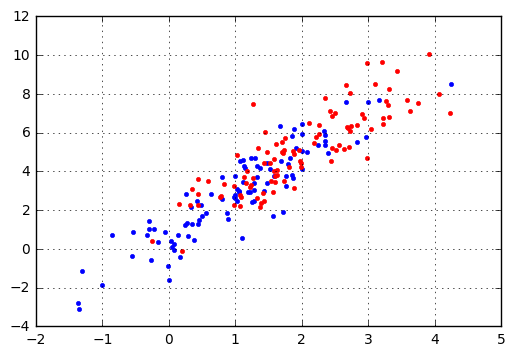

In [2]:
np.random.seed(12345)
nd = 100
x1p = np.random.randn(nd)+1
x1n = np.random.randn(nd)+2

x2p = x1p *2 + 1 + np.random.randn(nd)
x2n = x1n *2 + 1 + np.random.randn(nd)

x1 = np.concatenate([x1p, x1n])
x2 = np.concatenate([x2p, x2n])

xs = np.vstack([x1, x2]) #now the index for data point is the second index.
ys = np.concatenate([[1]*nd, [-1]*nd])
plt.plot(x1[ys>0], x2[ys>0], '.b')
plt.plot(x1[ys<0], x2[ys<0], '.r')
plt.grid(True)


1) Normalize the data so that the mean of each feature is 0 and standard deviation of each feature is 1.

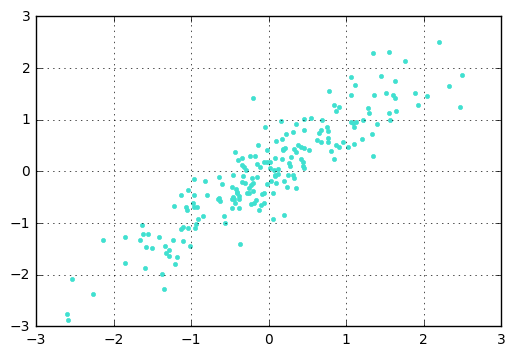

In [3]:
mean = np.mean(xs, axis = 1) # find the mean
norm_xs = xs - mean[:, np.newaxis] # zero out the mean (normalize xs)
norm_xs = norm_xs / np.std(norm_xs, axis=1)[:, np.newaxis] # standardize the variance zero mean (make variance to 1)

def plot_data(data):
    plt.plot(data[0,:], data[1,:], '.', color='turquoise')
    plt.grid(True)
plot_data(norm_xs)

2) What is the criteria for picking better axis?

In [ ]:
# maximize the variance 

3) What is the size of the covariance matrix? Why?

In [5]:
cov = np.cov(norm_xs)
cov

array([[ 1.00502513,  0.9100822 ],
       [ 0.9100822 ,  1.00502513]])

4) Find eigenvalue and eigenvector of the covariance matrix.

In [10]:
evals, evecs = np.linalg.eigh(cov)
print evals 
print evecs

[ 0.09494293  1.91510732]
[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]


In [11]:
evecs[:,0], evals[0]

(array([ 0.70710678, -0.70710678]), 0.094942926534799466)

In [15]:
print np.dot(cov, evecs[:,0]) 
print evals[0] * evecs[:,0]

[ 0.06713479 -0.06713479]
[ 0.06713479 -0.06713479]


In [16]:
print np.dot(cov, evecs[:,1]) 
print evals[1] * evecs[:,1]

[-1.35418538 -1.35418538]
[-1.35418538 -1.35418538]


5) Draw the eigenvectors on the plot.

[ 0.70710678 -0.70710678]


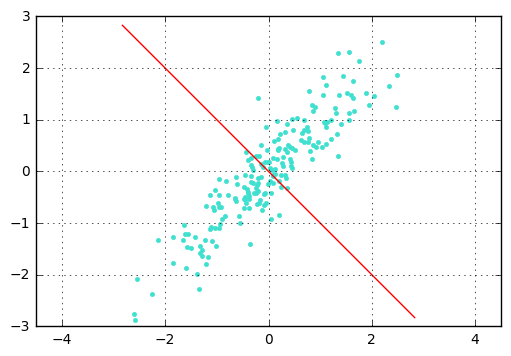

In [28]:
plot_data(norm_xs)
v = evecs[:,0]
print v
k = np.linspace(-4,4,100)
test = [v*i for i in k]
new_axis = np.zeros((len(v), len(k)))
new_axis[0,:] = v[0] * k
new_axis[1,:] = v[1] * k
plt.plot(new_axis[0,:], new_axis[1,:], "r")
plt.axes().set_aspect('equal', 'datalim')

[-0.70710678 -0.70710678]


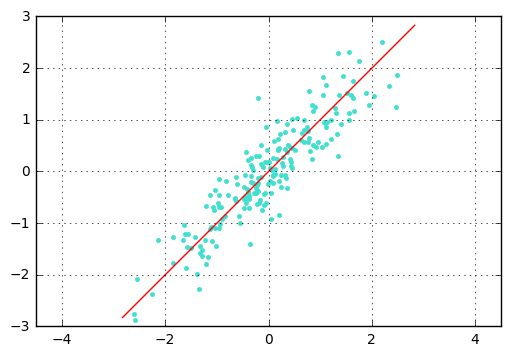

In [29]:
plot_data(norm_xs)
v = evecs[:,1]
print v
k = np.linspace(-4,4,100)
test = [v*i for i in k]
new_axis = np.zeros((len(v), len(k)))
new_axis[0,:] = v[0] * k
new_axis[1,:] = v[1] * k
plt.plot(new_axis[0,:], new_axis[1,:], "r")
plt.axes().set_aspect('equal', 'datalim')

6) Use eigenvector and compute the transformed feature vector.

In [32]:
new_xs = np.dot(evecs, norm_xs) # rotate at the axis

7) Plot transformed data point.

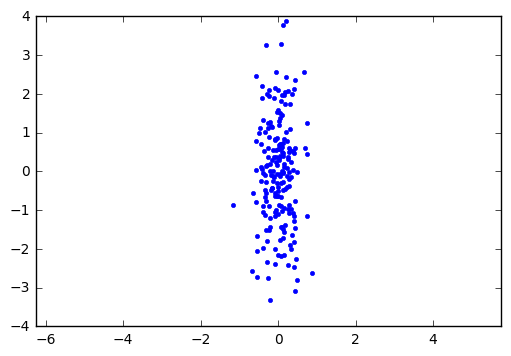

In [31]:
plt.plot(new_xs[0], new_xs[1], ".")
plt.axes().set_aspect('equal', 'datalim')

# Handwritten Digit Recognition.

In [3]:
D = loadmat('usps_resampled/usps_resampled.mat')
print D
#it is a dictionary of four elements
# train_labels for the number of each training image
# train_patterns for the train images
# test_labels
# test_patterns

{'train_labels': array([[-1,  1, -1, ..., -1, -1, -1],
       [-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       ..., 
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ...,  1, -1, -1]], dtype=int16), 'test_labels': array([[ 1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ..., 
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ...,  1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int16), 'train_patterns': array([[-0.99999988, -0.99999982, -0.99999988, ..., -0.9999997 ,
        -0.99997759, -0.99993992],
       [-0.9999997 , -0.99999845, -0.99999988, ..., -0.99996912,
        -0.99797225, -0.99719542],
       [-0.99998665, -0.99989259, -0.99999988, ..., -0.9983288 ,
        -0.96142083, -0.95687085],
       ..., 
       [-0.93985581, -0.76438236, -0.99999988, ..., -0.99999988,
        -0.97830033, -0.99999988],
       [-0.99104893, -0.9

In [4]:
#train_labels is in a funny format too
#here is how to use it
labels = D['train_labels'].T
#this is how they represent 6
print labels[0] 
print labels[0,6]

def make_class(c):
    return list(c).index(1)
labels = np.array([make_class(lb) for lb in labels])
print labels #more readable

[-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
1
[6 0 1 ..., 9 2 7]


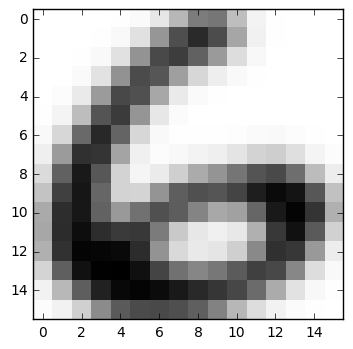

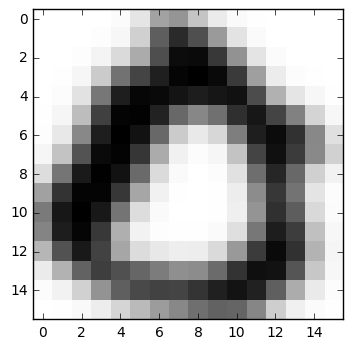

In [5]:
images = D['train_patterns']
def show(img):
    im = img.reshape(16,16) #you can try print it
    plt.imshow(im, interpolation='nearest', cmap=cm.Greys)
    
show(images[:,0])
plt.figure()
show(images[:,1])

In [7]:
%matplotlib inline
from numpy.linalg import svd
from numpy.random import rand
from matplotlib import pyplot as plt
import numpy as np

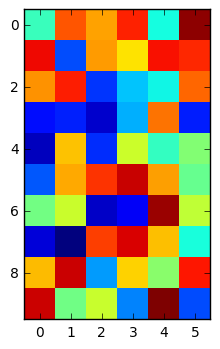

In [18]:
np.random.seed(27)
a = rand(10, 6)
plt.imshow(a,interpolation='none')

In [11]:
u, s, v = svd(a)

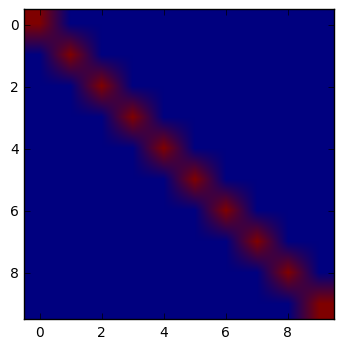

In [13]:
# Property number 2 is this gives out an identity matrix, orthorgonal matrix
plt.imshow(np.dot(u, u.T))

In [14]:
# Property number 3, same as above
print np.dot(v, v.T)

[[  1.00000000e+00  -1.52655666e-16   0.00000000e+00   2.08166817e-16
    1.11022302e-16  -2.49800181e-16]
 [ -1.52655666e-16   1.00000000e+00   5.55111512e-17   3.46944695e-17
    2.77555756e-17   1.80411242e-16]
 [  0.00000000e+00   5.55111512e-17   1.00000000e+00   1.24900090e-16
    2.77555756e-17  -6.93889390e-17]
 [  2.08166817e-16   3.46944695e-17   1.24900090e-16   1.00000000e+00
   -2.77555756e-17   4.30211422e-16]
 [  1.11022302e-16   2.77555756e-17   2.77555756e-17  -2.77555756e-17
    1.00000000e+00  -1.38777878e-16]
 [ -2.49800181e-16   1.80411242e-16  -6.93889390e-17   4.30211422e-16
   -1.38777878e-16   1.00000000e+00]]


In [36]:
sigma = np.zeros((10,6))
for i, x in enumerate(s):
    sigma[i,i] = x
sigma[5,5] = 0.
sigma[4,4] = 0.
#sigma[0,0] = 0.
sigma

array([[ 4.41659641,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  1.2897631 ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.17913244,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.75224275,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

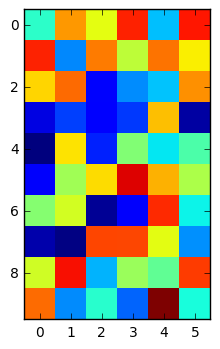

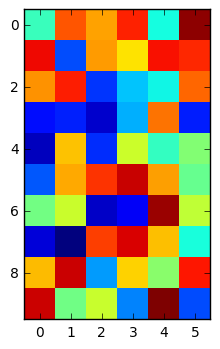

In [37]:
plt.imshow(np.dot(u, np.dot(sigma, v)), interpolation="none")
plt.figure()
plt.imshow(a, interpolation="none")

# Equal 

(256L, 4649L)


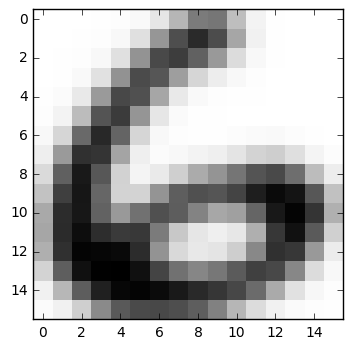

In [43]:
images = D['train_patterns']
print images.shape

def show(img):
    im = img.reshape(16,16)
    plt.imshow(im, interpolation="none", cmap = cm.Greys)
show(images[:,0])

In [44]:
u, s, v = np.linalg.svd(images)

In [46]:
u.shape

(256L, 256L)

In [70]:
k = 20
Q = np.dot(u.T , images)
small_Q = Q[:k, :]
small_Q.shape

(20L, 4649L)

In [71]:
small_U = u[:,:k]
sort_of_images = np.dot(small_U, small_Q)

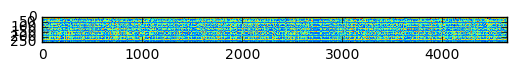

In [72]:
plt.imshow(sort_of_images)

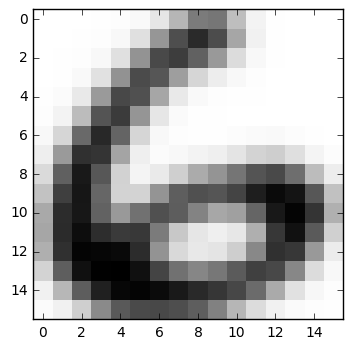

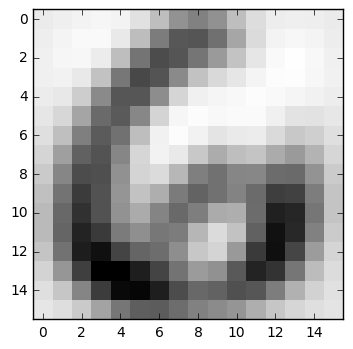

In [73]:
show(images[:,0])
plt.figure()
show(sort_of_images[:,0])